In [1]:
import os
from glob import glob

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 파이썬 문자열 관련 함수
- os
- glob
- replace: 문자열 교체하는 명령어
- split: 문자열 나누기
- join: 문자열을 합쳐주거나, array를 델리미터를 기준으로 합쳐준다
- strip: 빈 공간을 없애줌
- os.path.basename(path): 파일명
- os.path.dirname(path): 디렉토리 명
- os.path.exists(path): 파일 유무

In [2]:
os.listdir('../dataset/cifar/')

['labels.txt', 'test', 'train']

In [3]:
train_paths = glob('../dataset/cifar/train/*.png')
test_paths = glob('../dataset/cifar/test/*.png')

In [4]:
len(train_paths), len(test_paths)

(50000, 10000)

In [5]:
path = train_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

### class 이름 얻은 것을 함수로 묶기

In [6]:
def get_cls_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[-1]
    return cls_name

In [7]:
cls_name = get_cls_name(path)
path, cls_name

('../dataset/cifar/train\\0_frog.png', 'frog')

## Class 수 확인

In [9]:
class_names = [get_cls_name(path) for path in train_paths]

# class_names = []
# for path in train_paths:
#     cls_name = get_class_name(path)
#     class_names.append(cls_name)

In [10]:
len(class_names)

50000

In [11]:
# 유니크한것만
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [12]:
uniques = np.unique(class_names, return_counts=True)
uniques

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

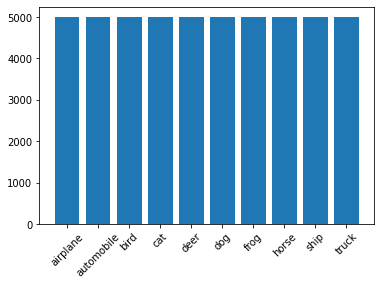

In [13]:
plt.bar(uniques[0], uniques[1])
plt.xticks(rotation=45)  # X축 이름 비스듬히 하는 옵션
plt.show()

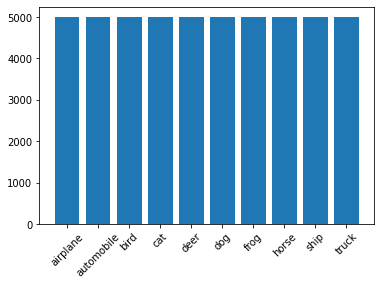

In [14]:
plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

## DataFrame 생성
파이썬에서 csv 또는 excel으 다룰 때 사용되는 library

주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다.

## DataFrame 생성방법

In [15]:
data_ex = {'a':[1, 2, 3], 'b':[10, 20, 30], 'c':[100, 200, 300]}

In [16]:
df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [17]:
train_paths[0], class_names[0]

('../dataset/cifar/train\\0_frog.png', 'frog')

In [18]:
data = {'name': train_paths, 'class': class_names}

In [19]:
train_df = pd.DataFrame(data)
train_df.head()   # haed(): 앞 5만 보여준다

,name,class
0,../dataset/cifar/train\0_frog.png,frog
1,../dataset/cifar/train\10000_automobile.png,automobile
2,../dataset/cifar/train\10001_frog.png,frog
3,../dataset/cifar/train\10002_frog.png,frog
4,../dataset/cifar/train\10003_ship.png,ship


In [22]:
test_class_names = [get_cls_name(path) for path in test_paths]

In [23]:
test_data = {'name': test_paths, 'class': test_class_names}

In [24]:
test_df = pd.DataFrame(test_data)
test_df.head()   # haed(): 앞 5만 보여준다

,name,class
0,../dataset/cifar/test\0_cat.png,cat
1,../dataset/cifar/test\1000_dog.png,dog
2,../dataset/cifar/test\1001_airplane.png,airplane
3,../dataset/cifar/test\1002_ship.png,ship
4,../dataset/cifar/test\1003_deer.png,deer


## 만들어진 DataFrame 저장

In [25]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [26]:
# index: 첫 컬럼의 인덱스 사용 여부
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

## Data 확인

In [27]:
from PIL import Image
from tqdm import notebook

In [28]:
heights = []
widths = []
path

'../dataset/cifar/train\\0_frog.png'

In [29]:
img_pil =Image.open(path)
image = np.array(img_pil)
image.shape # channel 있음

(32, 32, 3)

In [30]:
for path in notebook.tqdm(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heights.append(h)
    widths.append(w)

In [ ]:
np.unique(heights), np.unique(widths)